In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import biogeme.vns as vns
import biogeme.database as db

# Pareto reader

This notebook is used to display the information contained in the Pareto set generated by the algorithm, and saved in the pickle file. 

We need the following just to know the sample size. 

In [2]:
df = pd.read_csv('airline.dat', sep='\t')

# Update some data
df.loc[df['q17_Gender'] == 99, 'q17_Gender'] = -1
df.loc[df['q20_Education'] == 99, 'q20_Education'] = -1

database = db.Database('airline', df)
globals().update(database.variables)

exclude = (ArrivalTimeHours_1 == -1)
database.remove(exclude)
sampleSize = database.getSampleSize()
sampleSize

3609

The information about the approximation of the Pareto set is saved regularly by the algorithm in a pickle file. We first open it. 

In [3]:
pickleFile = 'airlinePareto.pickle'

The first argument is the largest size of neighborhood used by the algorithm. It is irrelevant when the algorithm is not executed. Here, we simply display the Pareto solutions. So it is not needed.

In [4]:
pareto = vns.paretoClass(_, archiveInputFile=pickleFile)

In [5]:
print(f'Number of pareto solutions: {len(pareto.pareto)}')

Number of pareto solutions: 40


We calculate the AIC and the BIC for non dominated each model.

In [6]:
def AIC(k, LL):
    """Calculate the Aikaike Information Criterion for a model with k parameters and final log liklelihood LL"""
    return 2 * k - 2 * LL

In [7]:
def BIC(k, LL):
    """Calculate the Bayesian Information Criterion for a model with k parameters and final log liklelihood LL"""
    return k * np.log(sampleSize) - 2 * LL


## List of Pareto solutions: performance measures

For each model in the Pareto set, we display:

- an id,
- the negative log likelihood,
- the number of parameters,
- the Bayesian information criterion (BIC), 
- the Akaike informatoin criterion (AIC).

The models with the best BIC (B*) and the best AIC (A*) are identified. If the same model has both the best BIC and AIC, it is labeled (**). 

In [8]:
bestBIC = None
bestAIC = None
summary = []
besti = -1
bestj = -1
for p in pareto.pareto:
    res = ''
    for t, r in zip(p.objectivesNames, p.objectives):
        res += f'{t}: {r}\t'
    L = p.objectives[0]
    k = p.objectives[1]
    A = AIC(k, -L)
    B = BIC(k, -L)
    res += f'BIC = {B:.3f}\tAIC = {A:.3f}'
    summary.append(res)
    if bestBIC is None or B < bestBIC:
        bestBIC = B
        besti = len(summary) - 1
    if bestAIC is None or A < bestAIC:
        bestAIC = A
        bestj = len(summary) - 1
for i in range(len(summary)):
    if i == besti:
        if i == bestj:
            pre = f'{i+1:3} **'
        else:
            pre = f'{i+1:3} B*'
    elif i == bestj:
        pre = f'{i+1:3} A*'
    else:
        pre = f'{i+1:3}   '
    print(f'{pre} {summary[i]}')

  1    Neg. log likelihood: 7963.456623682183	#parameters: 13	BIC = 16033.399	AIC = 15952.913
  2    Neg. log likelihood: 7637.330461244014	#parameters: 70	BIC = 15848.044	AIC = 15414.661
  3    Neg. log likelihood: 7823.588370155459	#parameters: 20	BIC = 15811.000	AIC = 15687.177
  4    Neg. log likelihood: 7645.033922729725	#parameters: 69	BIC = 15855.260	AIC = 15428.068
  5    Neg. log likelihood: 7731.163143855506	#parameters: 36	BIC = 15757.209	AIC = 15534.326
  6    Neg. log likelihood: 8846.120217298321	#parameters: 4	BIC = 17725.005	AIC = 17700.240
  7    Neg. log likelihood: 8040.758618032399	#parameters: 11	BIC = 16171.620	AIC = 16103.517
  8    Neg. log likelihood: 7844.3799952366735	#parameters: 19	BIC = 15844.393	AIC = 15726.760
  9    Neg. log likelihood: 8057.047039424712	#parameters: 9	BIC = 16187.815	AIC = 16132.094
 10    Neg. log likelihood: 7864.063345156672	#parameters: 17	BIC = 15867.377	AIC = 15762.127
 11    Neg. log likelihood: 7467.090120353681	#parameters: 14

## List of Pareto solutions: model specifications

For each model in the Pareto set, we provide a description of the model specification.

In [9]:
counter = 0 
for p in pareto.pareto:
    counter += 1
    print(f'*************** Model {counter} ************************')
    print(p)
    print('\n')
    

*************** Model 1 ************************
Nested one stop----------------------
Alternative train [1]
----------------------
Cte. <GA>
Train travel time_log [alt. spec.] <GA>
Train travel cost_log [alt. spec.] 

---------------------------
Alternative Swissmetro [2]
---------------------------
Cte. <GA>
Swissmetro travel time_log [alt. spec.] <GA>
Swissmetro travel cost_log [alt. spec.] 

--------------------
Alternative car [3]
--------------------
Car travel time_log [alt. spec.] <GA>
Car travel cost_log [alt. spec.] 

Neg. log likelihood: 7963.456623682183
#parameters: 13


*************** Model 2 ************************
Nested one stop----------------------
Alternative train [1]
----------------------
Cte. <GA, gender, income>
Train travel time_log [alt. spec.] <gender, luggage>
Train travel cost_log [alt. spec.] <class, who>
Train headway_log [generic] <class>
---------------------------
Alternative Swissmetro [2]
---------------------------
Cte. <GA, gender, income>
Swiss

## List of Pareto solutions: illustration

The plot below illustrates all models considered by the algorithm. Each model corresponds to one point in the graph. 

- The x-coordinate corresponds to the negative log likelihood of the model, and the y-coordinate to the number of parameters. 
- The larger circles correspond to all models that are not dominated. 
- The crosses corresponds to model that happened to be non dominated at some point during the course of the algorithm, but have been removed from the Pareto set afterwards, as a dominating model has been identified.
- Finally, the small dots corresponds to models that have been considered, but rejected because dominated by another model already in the set. 

In [10]:
objectives = list(pareto.pareto)[0].objectivesNames
objectives

['Neg. log likelihood', '#parameters']

In [11]:
par_obj = [p.objectives for p in pareto.pareto]
par_x, par_y = zip(*par_obj)

In [12]:
con_obj = [p.objectives for p in pareto.considered]
con_x, con_y = zip(*con_obj)

In [13]:
rem_obj = [p.objectives for p in pareto.removed]
rem_x, rem_y = zip(*rem_obj)

In [14]:
x_buffer = 10
y_buffer = 0.1

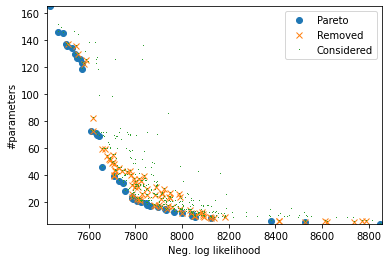

In [15]:
plt.axis([min(par_x)-x_buffer,
          max(par_x)+x_buffer,
          min(par_y)-y_buffer,
          max(par_y)+y_buffer])
plt.plot(par_x, par_y, 'o', label='Pareto')
plt.plot(rem_x, rem_y, 'x', label='Removed')
plt.plot(con_x, con_y, ',', label='Considered')
plt.xlabel(objectives[0])
plt.ylabel(objectives[1])
plt.legend()